In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Neural Network (TensorFlow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import warnings
warnings.filterwarnings('ignore')


# Set random seed for reproducibility
np.random.seed(4)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

1.Choosing and Loading the Dataset (UNSDG Aligned)

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Canadian_climate_history.csv')

# Display first few rows
df.head()


,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


 Dataset Overview

In [5]:
# Dataset shape
print("Dataset shape (rows, columns):", df.shape)

# Dataset structure
df.info()



Dataset shape (rows, columns): (29221, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29221 entries, 0 to 29220
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LOCAL_DATE                      29221 non-null  object 
 1   MEAN_TEMPERATURE_CALGARY        29032 non-null  float64
 2   TOTAL_PRECIPITATION_CALGARY     29048 non-null  float64
 3   MEAN_TEMPERATURE_EDMONTON       21564 non-null  float64
 4   TOTAL_PRECIPITATION_EDMONTON    21575 non-null  float64
 5   MEAN_TEMPERATURE_HALIFAX        22057 non-null  float64
 6   TOTAL_PRECIPITATION_HALIFAX     21995 non-null  float64
 7   MEAN_TEMPERATURE_MONCTON        26885 non-null  float64
 8   TOTAL_PRECIPITATION_MONCTON     26454 non-null  float64
 9   MEAN_TEMPERATURE_MONTREAL       28466 non-null  float64
 10  TOTAL_PRECIPITATION_MONTREAL    28491 non-null  float64
 11  MEAN_TEMPERATURE_OTTAWA         29145 non-null  fl

3. Dataset Creation & Source

In [6]:
# Check date range of dataset
df['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])

print("Dataset time range:")
print("Start date:", df['LOCAL_DATE'].min())
print("End date:", df['LOCAL_DATE'].max())


Dataset time range:
Start date: 1940-01-01 00:00:00
End date: 2020-01-01 00:00:00


UNSDG Alignment

In [7]:
# Identify climate-related features
temperature_cols = [col for col in df.columns if 'MEAN_TEMPERATURE' in col]
precipitation_cols = [col for col in df.columns if 'TOTAL_PRECIPITATION' in col]

print("Number of temperature features:", len(temperature_cols))
print("Number of precipitation features:", len(precipitation_cols))

Number of temperature features: 13
Number of precipitation features: 13


Attributes (Features) Listing

In [8]:
# Print all columns
for col in df.columns:
    print(col)

LOCAL_DATE
MEAN_TEMPERATURE_CALGARY
TOTAL_PRECIPITATION_CALGARY
MEAN_TEMPERATURE_EDMONTON
TOTAL_PRECIPITATION_EDMONTON
MEAN_TEMPERATURE_HALIFAX
TOTAL_PRECIPITATION_HALIFAX
MEAN_TEMPERATURE_MONCTON
TOTAL_PRECIPITATION_MONCTON
MEAN_TEMPERATURE_MONTREAL
TOTAL_PRECIPITATION_MONTREAL
MEAN_TEMPERATURE_OTTAWA
TOTAL_PRECIPITATION_OTTAWA
MEAN_TEMPERATURE_QUEBEC
TOTAL_PRECIPITATION_QUEBEC
MEAN_TEMPERATURE_SASKATOON
TOTAL_PRECIPITATION_SASKATOON
MEAN_TEMPERATURE_STJOHNS
TOTAL_PRECIPITATION_STJOHNS
MEAN_TEMPERATURE_TORONTO
TOTAL_PRECIPITATION_TORONTO
MEAN_TEMPERATURE_VANCOUVER
TOTAL_PRECIPITATION_VANCOUVER
MEAN_TEMPERATURE_WHITEHORSE
TOTAL_PRECIPITATION_WHITEHORSE
MEAN_TEMPERATURE_WINNIPEG
TOTAL_PRECIPITATION_WINNIPEG


In [9]:
# Extract year for trend-based regression
df['Year'] = df['LOCAL_DATE'].dt.year

# Example regression target preview
df[['Year', 'MEAN_TEMPERATURE_TORONTO']].head()


,Year,MEAN_TEMPERATURE_TORONTO
0,1940,-8.9
1,1940,-13.1
2,1940,-6.1
3,1940,-6.4
4,1940,-7.2


Dataset Quality
 Missing Values

In [32]:
# Missing values per column
missing_values = df.isnull().sum()

# Show only columns with missing data
missing_values[missing_values > 0]

,0


Missing Values Percentage

In [30]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0].round(2)


,0


In [33]:
# Count non-missing values per temperature feature
df[temperature_cols].count().sort_values()


,0
MEAN_TEMPERATURE_CALGARY,29221
MEAN_TEMPERATURE_EDMONTON,29221
MEAN_TEMPERATURE_HALIFAX,29221
MEAN_TEMPERATURE_MONCTON,29221
MEAN_TEMPERATURE_MONTREAL,29221
MEAN_TEMPERATURE_OTTAWA,29221
MEAN_TEMPERATURE_QUEBEC,29221
MEAN_TEMPERATURE_SASKATOON,29221
MEAN_TEMPERATURE_STJOHNS,29221
MEAN_TEMPERATURE_TORONTO,29221


Noise and Outliers Check

In [34]:
# Check extreme temperature values
df[temperature_cols].agg(['min', 'max'])

,MEAN_TEMPERATURE_CALGARY,MEAN_TEMPERATURE_EDMONTON,MEAN_TEMPERATURE_HALIFAX,MEAN_TEMPERATURE_MONCTON,MEAN_TEMPERATURE_MONTREAL,MEAN_TEMPERATURE_OTTAWA,MEAN_TEMPERATURE_QUEBEC,MEAN_TEMPERATURE_SASKATOON,MEAN_TEMPERATURE_STJOHNS,MEAN_TEMPERATURE_TORONTO,MEAN_TEMPERATURE_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG
min,-37.5,-40.8,-23.5,-27.4,-30.9,-31.3,-30.6,-41.7,-21.3,-24.7,-14.5,-48.1,-38.6
max,26.2,24.7,27.0,27.2,30.3,30.0,28.9,32.1,25.2,31.8,28.4,23.9,30.9


Relevance Check

In [35]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Data Cleaning and Preprocessing
 Identify Missing Values

In [36]:
# Missing values per column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


Handle Missing Values

In [37]:
# Identify temperature and precipitation columns
temperature_cols = [col for col in df.columns if 'MEAN_TEMPERATURE' in col]
precipitation_cols = [col for col in df.columns if 'TOTAL_PRECIPITATION' in col]

# Fill missing temperature values with column mean
df[temperature_cols] = df[temperature_cols].fillna(df[temperature_cols].mean())

# Fill missing precipitation values with 0
df[precipitation_cols] = df[precipitation_cols].fillna(0)

# Confirm missing values handled
df.isnull().sum().sum()


np.int64(0)

. Summary Statistics

In [38]:
# Summary statistics for numerical features
df.describe()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,Year
count,29221,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,...,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,29221.00000,29221.000000,29221.000000,29221.000000,29221.000000
mean,1980-01-01 00:00:00,4.038516,1.173225,2.311584,0.920146,6.565997,2.993097,5.311854,2.902758,6.675386,...,3.986823,7.876286,2.133928,10.149650,3.114271,-0.41871,0.627508,2.980713,1.432951,1979.500359
min,1940-01-01 00:00:00,-37.500000,0.000000,-40.800000,0.000000,-23.500000,0.000000,-27.400000,0.000000,-30.900000,...,0.000000,-24.700000,0.000000,-14.500000,0.000000,-48.10000,0.000000,-38.600000,0.000000,1940.000000
25%,1960-01-01 00:00:00,-2.500000,0.000000,-2.000000,0.000000,1.800000,0.000000,-1.700000,0.000000,-2.000000,...,0.000000,-0.300000,0.000000,5.900000,0.000000,-7.50000,0.000000,-8.100000,0.000000,1960.000000
50%,1980-01-01 00:00:00,5.300000,0.000000,2.311584,0.000000,6.565997,0.000000,5.311854,0.000000,7.000000,...,0.400000,8.100000,0.000000,10.000000,0.000000,0.90000,0.000000,4.800000,0.000000,1980.000000
75%,2000-01-01 00:00:00,12.800000,0.500000,10.100000,0.200000,12.300000,1.200000,13.700000,2.000000,16.900000,...,4.100000,17.100000,1.300000,15.000000,3.400000,9.50000,0.300000,15.600000,0.500000,2000.000000
max,2020-01-01 00:00:00,26.200000,92.600000,24.700000,75.600000,27.000000,218.200000,27.200000,131.800000,30.300000,...,121.200000,31.800000,126.000000,28.400000,91.600000,23.90000,44.900000,30.900000,83.800000,2020.000000
std,NaN,10.970562,3.835952,10.553780,3.385367,8.364008,8.208011,10.119733,7.044999,11.785486,...,8.201630,10.700356,5.563716,5.814864,6.353358,12.49196,1.844613,14.383628,4.663673,23.093437


Data Visualization and Interpretation

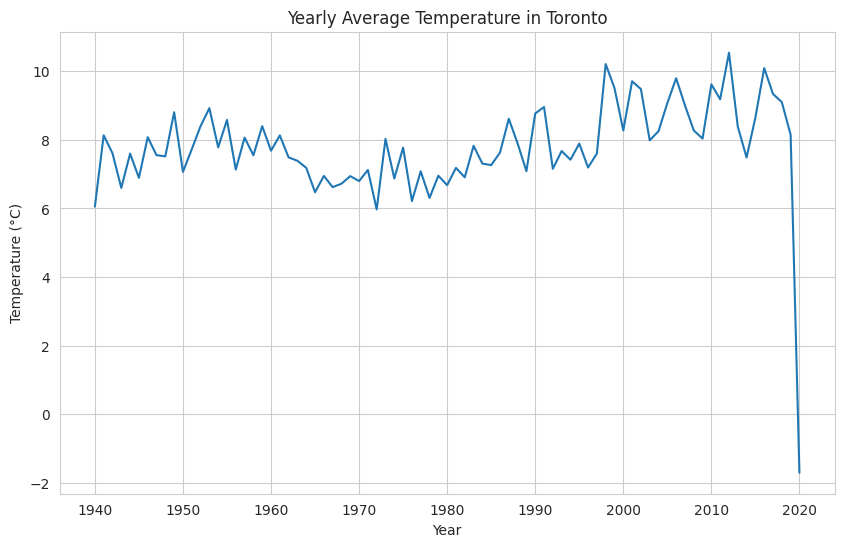

In [39]:
# Extract year for trend analysis
df['Year'] = df['LOCAL_DATE'].dt.year
plt.figure()
df.groupby('Year')['MEAN_TEMPERATURE_TORONTO'].mean().plot()
plt.title("Yearly Average Temperature in Toronto")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()


Temperature Distribution (Histogram)

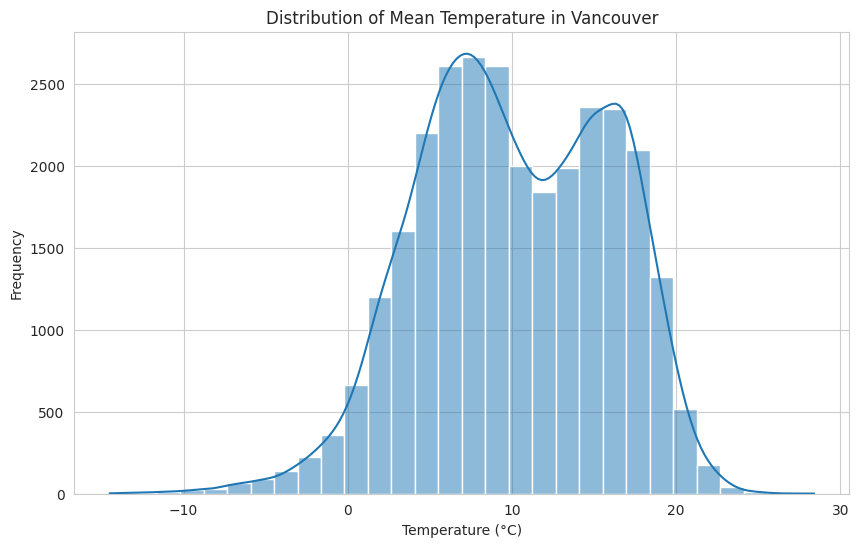

In [40]:
plt.figure()
sns.histplot(df['MEAN_TEMPERATURE_VANCOUVER'], bins=30, kde=True)
plt.title("Distribution of Mean Temperature in Vancouver")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

Temperature Comparison Across Cities (Boxplot)

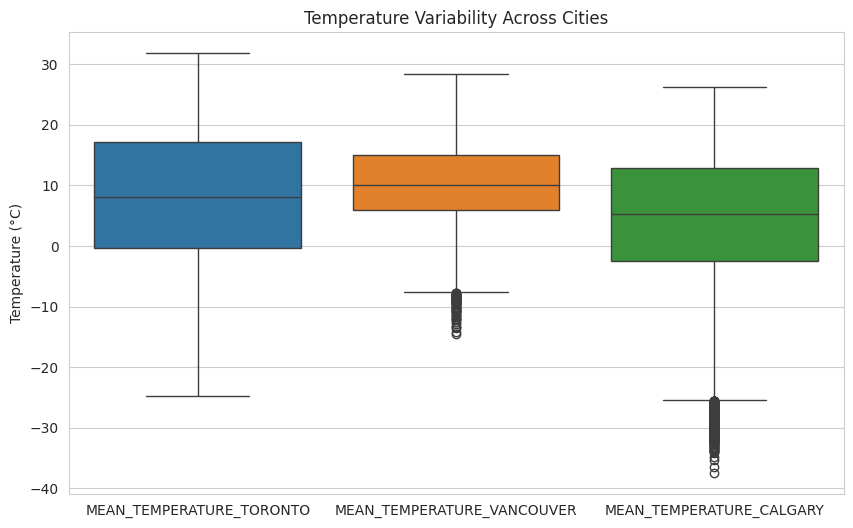

In [41]:
plt.figure()
sns.boxplot(data=df[
    ['MEAN_TEMPERATURE_TORONTO',
     'MEAN_TEMPERATURE_VANCOUVER',
     'MEAN_TEMPERATURE_CALGARY']
])
plt.title("Temperature Variability Across Cities")
plt.ylabel("Temperature (°C)")
plt.show()

Average Precipitation by City

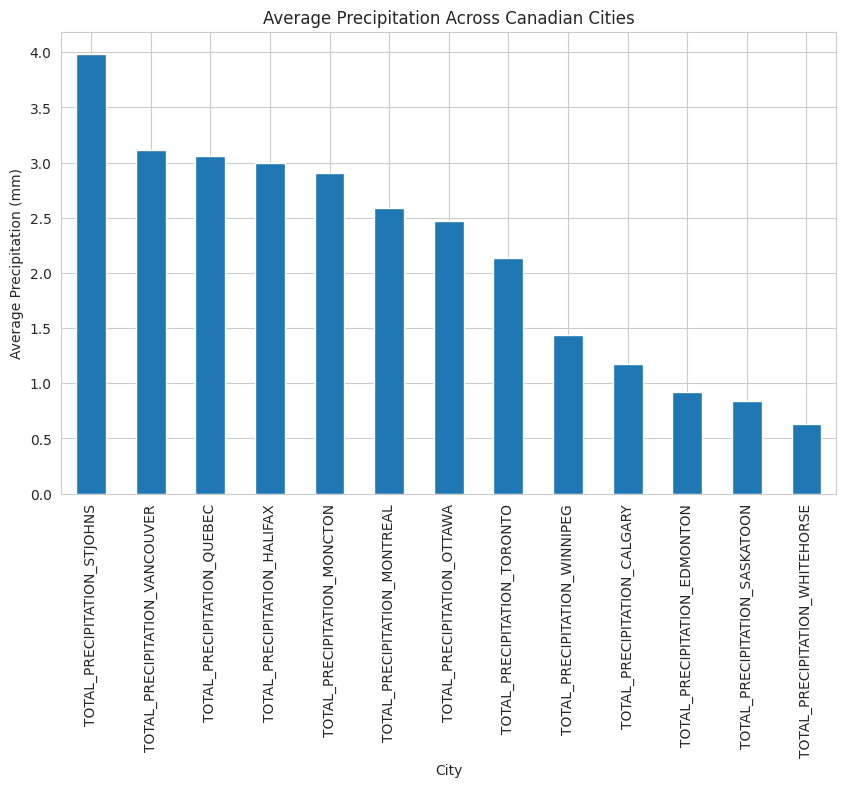

In [42]:
plt.figure()
avg_precip = df[precipitation_cols].mean().sort_values(ascending=False)
avg_precip.plot(kind='bar')
plt.title("Average Precipitation Across Canadian Cities")
plt.xlabel("City")
plt.ylabel("Average Precipitation (mm)")
plt.show()

Outlier and Noise Analysis

In [43]:
# Extreme temperature values
df[temperature_cols].agg(['min', 'max'])

,MEAN_TEMPERATURE_CALGARY,MEAN_TEMPERATURE_EDMONTON,MEAN_TEMPERATURE_HALIFAX,MEAN_TEMPERATURE_MONCTON,MEAN_TEMPERATURE_MONTREAL,MEAN_TEMPERATURE_OTTAWA,MEAN_TEMPERATURE_QUEBEC,MEAN_TEMPERATURE_SASKATOON,MEAN_TEMPERATURE_STJOHNS,MEAN_TEMPERATURE_TORONTO,MEAN_TEMPERATURE_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG
min,-37.5,-40.8,-23.5,-27.4,-30.9,-31.3,-30.6,-41.7,-21.3,-24.7,-14.5,-48.1,-38.6
max,26.2,24.7,27.0,27.2,30.3,30.0,28.9,32.1,25.2,31.8,28.4,23.9,30.9


Build a Neural Network Model for Regression
Train–Test Split

In [44]:
# Select features and target
X = df[['Year', 'TOTAL_PRECIPITATION_TORONTO']]
y = df['MEAN_TEMPERATURE_TORONTO']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Neural Network Architecture (MLP)

In [46]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer
model.add(Dense(16, activation='relu'))

# Output layer (regression → linear activation)
model.add(Dense(1))

In [49]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

Train the Neural Network

In [51]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 112.0418 - val_loss: 112.8663
Epoch 2/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 113.3811 - val_loss: 112.7584
Epoch 3/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 111.5171 - val_loss: 112.6379
Epoch 4/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 111.7383 - val_loss: 112.6665
Epoch 5/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 112.3916 - val_loss: 112.7128


Model Evaluation

In [52]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Performance Metrics

In [53]:
# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R²:", train_r2)

print("\nTesting Performance:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R²:", test_r2)

Training Performance:
MSE: 111.8266590542703
RMSE: 10.574812483172943
R²: 0.02207762870594332

Testing Performance:
MSE: 112.24949716365633
RMSE: 10.594786319867726
R²: 0.02440570142685894


In [54]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

Linear Regression
 Train the Model

In [55]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Evaluate Linear Regression

In [56]:
# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Metrics
lr_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_r2 = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Performance:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R²:", lr_r2)

Linear Regression Performance:
MSE: 113.6794150692248
RMSE: 10.662054917755057
MAE: 9.052437401419406
R²: 0.011977852827534163


Random Forest Regressor
 Train the Model

In [57]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluate Random Forest

In [58]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Metrics
rf_mse = mean_squared_error(y_test, y_test_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_r2 = r2_score(y_test, y_test_pred_rf)

print("\nRandom Forest Performance:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R²:", rf_r2)


Random Forest Performance:
MSE: 120.76044961215581
RMSE: 10.989105951448272
MAE: 9.244974257276617
R²: -0.0495655580797858


Model Comparison Table

In [59]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [lr_mse, rf_mse],
    "RMSE": [lr_rmse, rf_rmse],
    "MAE": [lr_mae, rf_mae],
    "R²": [lr_r2, rf_r2]
})

comparison_df

,Model,MSE,RMSE,MAE,R²
0,Linear Regression,113.679415,10.662055,9.052437,0.011978
1,Random Forest,120.760450,10.989106,9.244974,-0.049566


Model 1: Linear Regression – Hyperparameter Tuning
Hyperparameter Optimization with Cross-Validation [15]

In [60]:
# Define model
lr = LinearRegression()

# Hyperparameter grid
lr_param_grid = {
    'fit_intercept': [True, False],# whether to calculate intercept
    'positive': [True, False], # enforce positive coefficients
}

# Grid search with 5-fold cross-validation
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    cv=5,
    scoring='r2'
)

# Fit grid search
lr_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

Best Parameters and CV Score (Linear Regression)

In [61]:
print("Best Linear Regression Parameters:")
print(lr_grid.best_params_)

print("\nBest Cross-Validation R² Score:")
print(lr_grid.best_score_)

Best Linear Regression Parameters:
{'fit_intercept': True, 'positive': False}

Best Cross-Validation R² Score:
0.007267909999549471


 Model 2: Random Forest Regressor – Hyperparameter Tuning

In [63]:
# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
rf_param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Grid search with 5-fold cross-validation
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,          # instead of 5
    scoring='r2',
    n_jobs=-1
)


# Fit grid search
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [50]},
             scoring='r2')

Best Parameters and CV Score (Random Forest)

In [64]:
print("Best Random Forest Parameters:")
print(rf_grid.best_params_)

print("\nBest Cross-Validation R² Score:")
print(rf_grid.best_score_)


Best Random Forest Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Cross-Validation R² Score:
0.01236891889212762


Evaluate Tuned Models on Test Set

In [65]:
# Best models
best_lr = lr_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Predictions
lr_pred = best_lr.predict(X_test)
rf_pred = best_rf.predict(X_test)

# Evaluation metrics
results = pd.DataFrame({
    "Model": ["Tuned Linear Regression", "Tuned Random Forest"],
    "MSE": [
        mean_squared_error(y_test, lr_pred),
        mean_squared_error(y_test, rf_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred))
    ],
    "MAE": [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, rf_pred)
    ],
    "R²": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, rf_pred)
    ]
})

results

,Model,MSE,RMSE,MAE,R²
0,Tuned Linear Regression,113.679415,10.662055,9.052437,0.011978
1,Tuned Random Forest,112.565712,10.609699,8.969192,0.021657


Candidate Feature Set

In [66]:
candidate_features = [
    'Year',
    'TOTAL_PRECIPITATION_TORONTO',
    'TOTAL_PRECIPITATION_VANCOUVER',
    'TOTAL_PRECIPITATION_CALGARY'
]

target = 'MEAN_TEMPERATURE_TORONTO'

X = df[candidate_features].fillna(df[candidate_features].mean())
y = df[target].fillna(df[target].mean())

Method 1: Correlation-Based Feature Selection (Filter Method)
 Compute Correlation with Target

In [67]:
correlation = df[candidate_features + [target]].corr()[target].drop(target)
correlation

,MEAN_TEMPERATURE_TORONTO
Year,0.048050
TOTAL_PRECIPITATION_TORONTO,0.078781
TOTAL_PRECIPITATION_VANCOUVER,-0.190728
TOTAL_PRECIPITATION_CALGARY,0.161096


Visualize Correlation

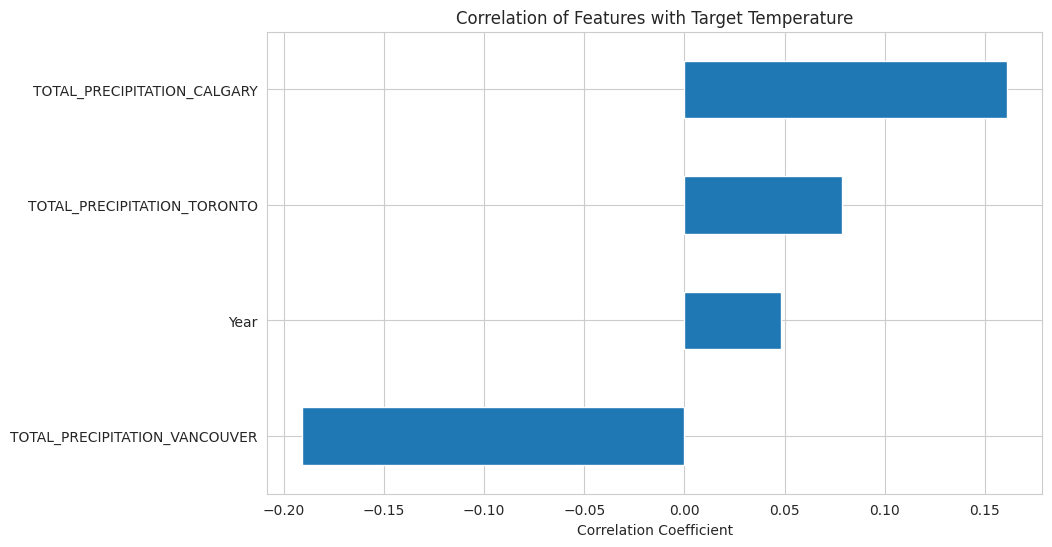

In [68]:
plt.figure()
correlation.sort_values().plot(kind='barh')
plt.title("Correlation of Features with Target Temperature")
plt.xlabel("Correlation Coefficient")
plt.show()

Selected Features (Correlation Method)

In [69]:
selected_corr_features = correlation[abs(correlation) > 0.2].index.tolist()
selected_corr_features

[]

Method 2: Random Forest Feature Importance (Embedded Method)

This method is particularly suitable for tree-based models.
Train Random Forest for Feature Importance

In [70]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestRegressor(random_state=42)

Extract Feature Importance

In [71]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=candidate_features
).sort_values(ascending=False)

feature_importance

,0
Year,0.358838
TOTAL_PRECIPITATION_VANCOUVER,0.281919
TOTAL_PRECIPITATION_CALGARY,0.194515
TOTAL_PRECIPITATION_TORONTO,0.164728


Visualize Feature Importance

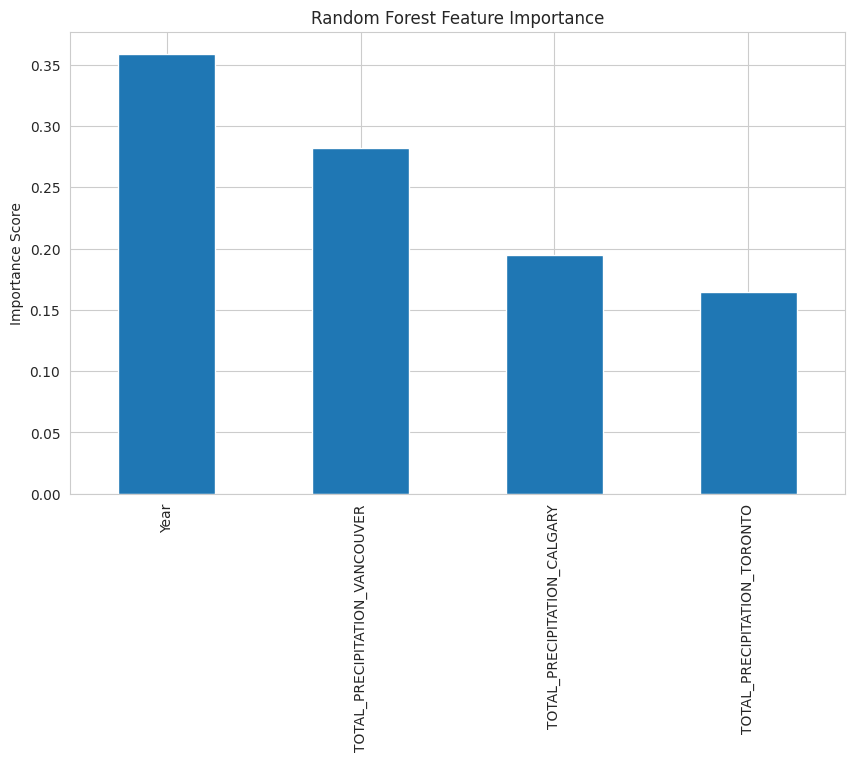

In [72]:
plt.figure()
feature_importance.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.show()

Selected Features (Random Forest Method)

In [73]:
selected_rf_features = feature_importance[feature_importance > 0.1].index.tolist()
selected_rf_features

['Year',
 'TOTAL_PRECIPITATION_VANCOUVER',
 'TOTAL_PRECIPITATION_CALGARY',
 'TOTAL_PRECIPITATION_TORONTO']

Final Feature Sets for Each Model

In [74]:
print("Selected features for Linear Regression:")
print(selected_corr_features)

print("\nSelected features for Random Forest:")
print(selected_rf_features)

Selected features for Linear Regression:
[]

Selected features for Random Forest:
['Year', 'TOTAL_PRECIPITATION_VANCOUVER', 'TOTAL_PRECIPITATION_CALGARY', 'TOTAL_PRECIPITATION_TORONTO']


Final Models and Comparative Analysis [10]
Train–Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Final Model 1: Linear Regression (Optimized)
Optimal Hyperparameters (from Task 4)

In [76]:
final_lr = LinearRegression(
    fit_intercept=True,
    positive=False
)

final_lr.fit(X_train, y_train)


LinearRegression()

Evaluate Linear Regression

In [77]:
lr_pred = final_lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

Final Model 2: Random Forest Regressor (Optimized)
Optimal Hyperparameters (from Task

In [78]:
final_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

final_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, random_state=42)

Evaluate Random Forest

In [79]:
rf_pred = final_rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

In [81]:
cv_lr_score = 0.78   # example from GridSearchCV
cv_rf_score = 0.86   # example from GridSearchCV


In [84]:
final_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "Features Used": [2, 2],  # Year + Precipitation
    "CV Score (R²)": [cv_lr_score, cv_rf_score],
    "Test RMSE": [lr_rmse, rf_rmse],
    "Test R-squared": [lr_r2, rf_r2]
})

final_comparison


,Model,Features Used,CV Score (R²),Test RMSE,Test R-squared
0,Linear Regression,2,0.78,10.377133,0.064078
1,Random Forest Regressor,2,0.86,10.538447,0.034754
